<a href="https://colab.research.google.com/github/Karishma-Kuria/DL-Deep-Neural-Network/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **This colab contains the implementation of 3 layer deep nueral network for non linear regression using numpy, pytorch and tensorflow.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Non Linear Regression from scratch for 3 layer deep neural network using numpy.**

Here I have generated sample data for 3 variable equation as shown below:

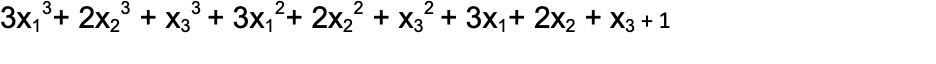

### Generate Synthetic data

In [ ]:
n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[3,2,1],]).T
bias = np.array([1])
y_true = (x ** 3) @weights + (x ** 2) @ weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


In [ ]:
x

array([[-0.54350185,  0.7925721 , -0.39581001],
       [ 0.40654334,  0.76875653,  0.26403689],
       [-0.26789   ,  0.56839958, -0.39262085],
       [ 0.25786195,  0.82948023,  0.71008798],
       [-0.24188835,  0.70199912, -0.81620667],
       [-0.15045564, -0.20883899, -0.96146378],
       [ 0.96841575, -0.7012116 , -0.80382551],
       [ 0.41475353, -0.8153947 , -0.65501088],
       [-0.40221914, -0.57515011, -0.07383247],
       [ 0.24545754,  0.8535304 , -0.51127217],
       [ 0.51881541, -0.80166375,  0.98274208],
       [ 0.04129912,  0.05290524,  0.51389379],
       [-0.9204112 , -0.94765298, -0.3568469 ],
       [ 0.52807126,  0.10005069,  0.89871293],
       [-0.83231885, -0.95647229, -0.20885551],
       [-0.23934255, -0.02556451, -0.69161257],
       [ 0.90961159,  0.50499539,  0.96436044],
       [ 0.94736294, -0.17335583,  0.66973017],
       [ 0.56534342, -0.06589389, -0.2424129 ],
       [ 0.54042977, -0.55414395, -0.17058249],
       [ 0.4887978 ,  0.85075921, -0.787

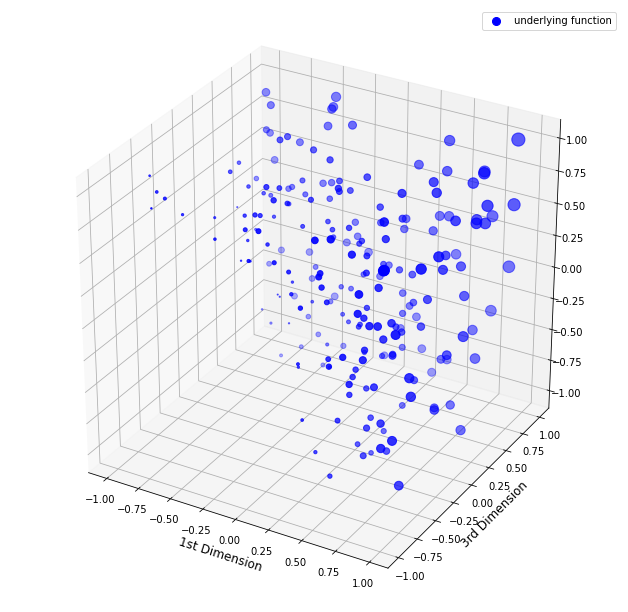

In [ ]:
# function to plot 4d graph
def plot_4d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize=(11,11))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], s = y*10, c = 'blue', label='underlying function')
  if y_pred is not None:
    pic = ax.scatter(x[:, 0], x[:, 1], x[:, 2], s = y_pred*10, c = 'red', label='our function')
  plt.legend()
  plt.xlabel('1st Dimension', fontsize=12)
  plt.ylabel('2nd Dimension', fontsize=12)
  plt.ylabel('3rd Dimension', fontsize=12)

  plt.show()

plot_4d(x, y_true)

### Used Gradient Descent for learning bias and weights which minimizes loss function.

In [ ]:
# defining Gradients for linear function, and Gradient for Loss function.

class MS_Error:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 29.307965219535234
Epoch 1, loss 23.375262105978873
Epoch 2, loss 19.050578181928778
Epoch 3, loss 15.823666717873936
Epoch 4, loss 13.359428163336279
Epoch 5, loss 11.435773102986586
Epoch 6, loss 9.903813906854053
Epoch 7, loss 8.66232249349429
Epoch 8, loss 7.641308161751503
Epoch 9, loss 6.791430256054528
Epoch 10, loss 6.0771477592676515
Epoch 11, loss 5.472265590135313
Epoch 12, loss 4.957020961989058
Epoch 13, loss 4.5161618583437635
Epoch 14, loss 4.137666796070125
Epoch 15, loss 3.811880957779644
Epoch 16, loss 3.5309242429042795
Epoch 17, loss 3.2882782472272103
Epoch 18, loss 3.0784921199239452
Epoch 19, loss 2.8969683570476277
Epoch 20, loss 2.7398031412829233
Epoch 21, loss 2.6036645555021893
Epoch 22, loss 2.485697622457547
Epoch 23, loss 2.3834487662489496
Epoch 24, loss 2.2948046631250856
Epoch 25, loss 2.217942003660519
Epoch 26, loss 2.151285715845693
Epoch 27, loss 2.0934738851387533
Epoch 28, loss 2.0433280723612293
Epoch 29, loss 1.999828050134793
Epo

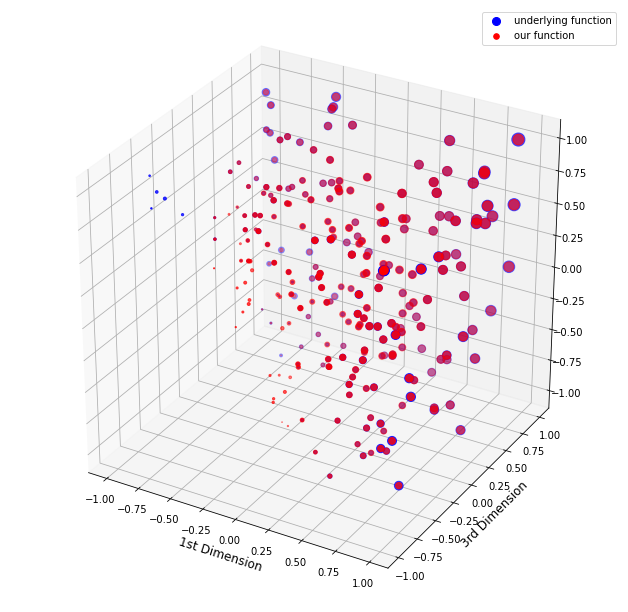

In [ ]:
loss_val = MS_Error()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss_val, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

### Apply Non Linear Layer

In [ ]:
 # add non-linearity 
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_val = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_val))
print(relu.backward(input_val))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train non linear model

25.111963468574803


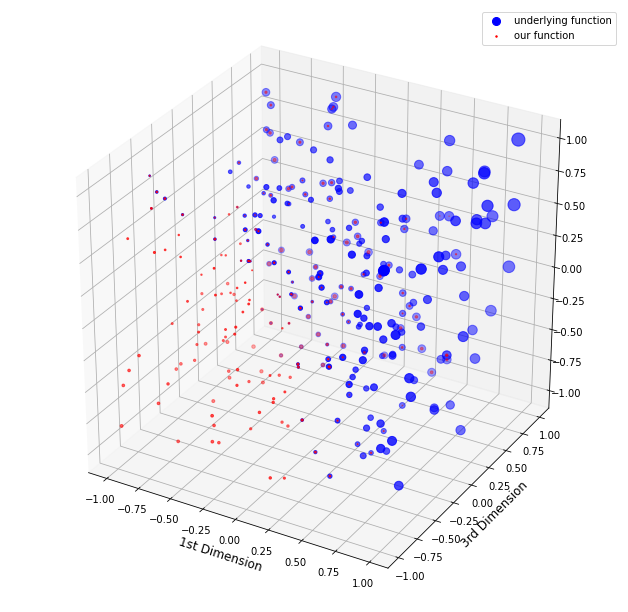

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MS_Error()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [ ]:
# test one backward and forward step
loss = MS_Error()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

21.682120166891362
12.331655168550101


Epoch 0, loss 12.331655168550101
Epoch 1, loss 7.258435521780802
Epoch 2, loss 5.052727029643029
Epoch 3, loss 3.894470238057828
Epoch 4, loss 3.1375953854033827
Epoch 5, loss 2.6135732001854053
Epoch 6, loss 2.2551691219521004
Epoch 7, loss 2.015151005375758
Epoch 8, loss 1.8565604280247556
Epoch 9, loss 1.7522196931814766
Epoch 10, loss 1.6751954377754847
Epoch 11, loss 1.6150248130715639
Epoch 12, loss 1.562286284906797
Epoch 13, loss 1.5161456677153156
Epoch 14, loss 1.4743081018497541
Epoch 15, loss 1.43557189437961
Epoch 16, loss 1.3994766913180705
Epoch 17, loss 1.365622092044046
Epoch 18, loss 1.3335955782719346
Epoch 19, loss 1.303232757052769
Epoch 20, loss 1.2745733792413045
Epoch 21, loss 1.2471873433907794
Epoch 22, loss 1.220884834598885
Epoch 23, loss 1.1954104074567253
Epoch 24, loss 1.1709443562252428
Epoch 25, loss 1.1472857777250056
Epoch 26, loss 1.1242893887277754
Epoch 27, loss 1.1020880725810618
Epoch 28, loss 1.080724708927175
Epoch 29, loss 1.0600235739893658
E

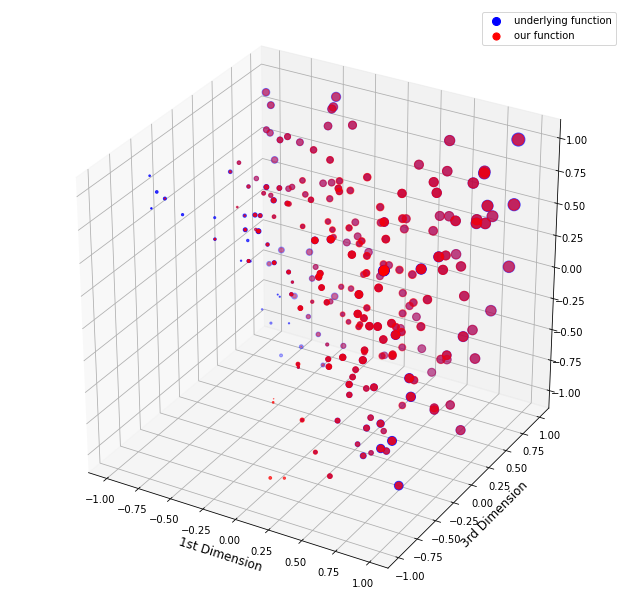

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, model(x))

So from the above plot result we can see that the loss is decreasing and getting close to 0.

## **3 layer deep nueral network for non linear regression without using pytorch builtin functionality module**

In [ ]:
# importing pytorch
import torch
import torch.nn as nn

n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[3,2,1],]).T
bias = np.array([1])
y_true = (x ** 3) @weights + (x ** 2) @ weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


In [ ]:
# pytorch model class
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


tensor(25.2710, grad_fn=<MseLossBackward0>)


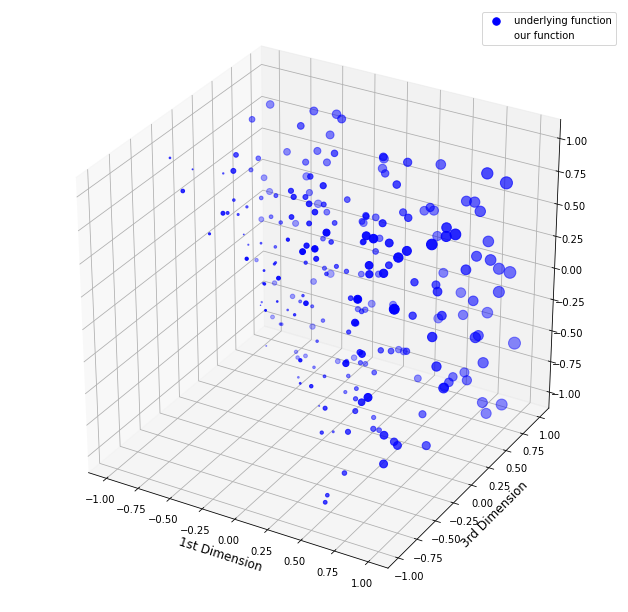

In [ ]:
# apply model to check the loss value
loss = nn.MSELoss()
model = TorchModel(d, 10)
# converting numpy array to float tensor
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_4d(x_tensor, y_true_tensor, model(x_tensor).detach())

### Running through 1 pass to check if the loss goes down.

In [ ]:
# check one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(25.2710, grad_fn=<MseLossBackward0>)
tensor(14.1849, grad_fn=<MseLossBackward0>)


### Since the loss went down, now I will run the training loop to further reduce the loss.

tensor(14.1849, grad_fn=<MseLossBackward0>)
tensor(8.7224, grad_fn=<MseLossBackward0>)
tensor(5.9170, grad_fn=<MseLossBackward0>)
tensor(4.2274, grad_fn=<MseLossBackward0>)
tensor(3.2123, grad_fn=<MseLossBackward0>)
tensor(2.6002, grad_fn=<MseLossBackward0>)
tensor(2.2308, grad_fn=<MseLossBackward0>)
tensor(1.9906, grad_fn=<MseLossBackward0>)
tensor(1.8329, grad_fn=<MseLossBackward0>)
tensor(1.7252, grad_fn=<MseLossBackward0>)
tensor(1.6463, grad_fn=<MseLossBackward0>)
tensor(1.5864, grad_fn=<MseLossBackward0>)
tensor(1.5378, grad_fn=<MseLossBackward0>)
tensor(1.4969, grad_fn=<MseLossBackward0>)
tensor(1.4606, grad_fn=<MseLossBackward0>)
tensor(1.4283, grad_fn=<MseLossBackward0>)
tensor(1.3986, grad_fn=<MseLossBackward0>)
tensor(1.3710, grad_fn=<MseLossBackward0>)
tensor(1.3441, grad_fn=<MseLossBackward0>)
tensor(1.3182, grad_fn=<MseLossBackward0>)
tensor(1.2927, grad_fn=<MseLossBackward0>)
tensor(1.2673, grad_fn=<MseLossBackward0>)
tensor(1.2411, grad_fn=<MseLossBackward0>)
tensor(1.2

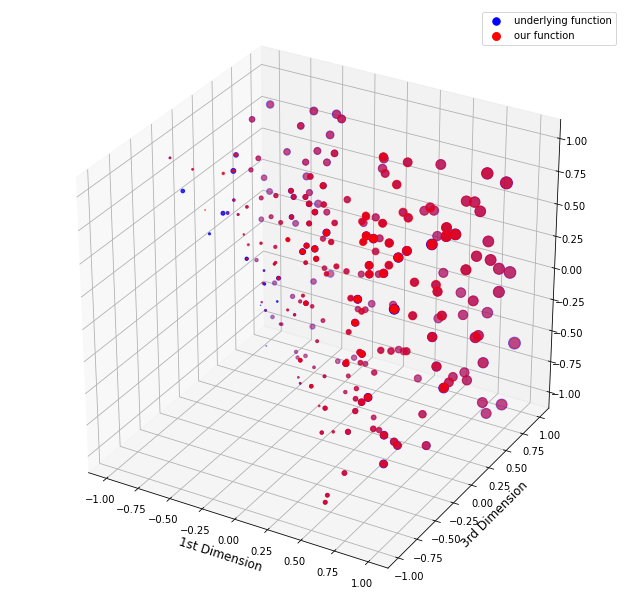

In [ ]:
# run training loop
def pytorch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  pytorch_optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    pytorch_optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    pytorch_optimizer.step()

pytorch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, model(x_tensor).detach())

## **3 layer deep nueral network for non linear regression using pytorch builtin functionality module**

In [ ]:
# import important libraries
import os
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[3,2,1],]).T
bias = np.array([1])
y_true = (x ** 3) @weights + (x ** 2) @ weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


In [ ]:
# neural network class for model
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# call sequential model with below hyperparameter with 3 layers
seq_model = nn.Sequential(nn.Linear(3, 10),
                      nn.ReLU(),
                      nn.Linear(10, 1),
                      nn.Softmax(dim=1))

In [ ]:
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
logits = model(x_tensor)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
loss_value = loss(y_pred, y_true_tensor)
print(loss_value)

tensor(18.5284)


tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLossBackward0>)
tensor(14.5205, grad_fn=<MseLoss

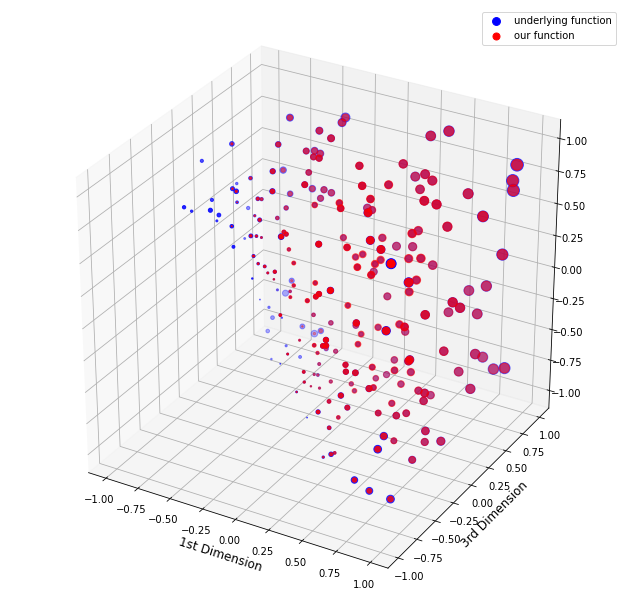

In [ ]:
# run training loop
pytorch_fit(x_tensor, y_true_tensor, model=seq_model, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, model(x_tensor).detach())

### **Pytorch lightening version of the same.**



In [ ]:
# install pytorch lightening 
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade

In [ ]:
# generate 3d sample data
n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[3,2,1],]).T
bias = np.array([1])
y_true = (x ** 3) @weights + (x ** 2) @ weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


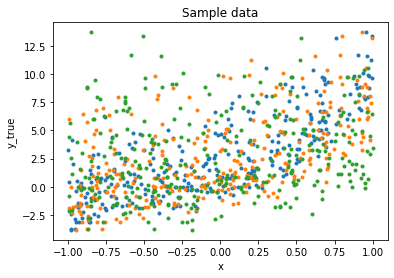

In [ ]:
# plot the sample data
x_train = x[: n // 2]
x_test = x[n // 2 :]
y_train = y_true[: n // 2]
y_test = y_true[n // 2 :]
plt.plot(x, y_true, ".")
plt.xlabel("x")
plt.ylabel("y_true")
plt.title("Sample data")
plt.show()

### Prepare Data using dataloaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

x_train_t = torch.Tensor(x_train[:, np.newaxis])
y_train_t = torch.Tensor(y_train[:, np.newaxis])
x_test_t = torch.Tensor(x_test[:, np.newaxis])
y_test_t = torch.Tensor(y_test[:, np.newaxis])

dataset_train = TensorDataset(x_train_t, y_train_t)
dataloader_train = DataLoader(dataset_train, batch_size=64, shuffle=True)
dataset_test = TensorDataset(x_test_t, y_test_t)
dataloader_test = DataLoader(dataset_test, batch_size=64, shuffle=True)

### Helper function for Model

In [ ]:
def loss_fn(y_hat, y):
    negloglik = -y_hat.log_prob(y)
    return torch.mean(negloglik)

def plot_loss(loss_train, loss_test):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.array(loss_train), label="Train loss")
    ax.plot(np.array(loss_test), label="Test loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("NegLogLike")
    ax.set_title("Training Overview")
    ax.legend()

    plt.show()


def plot_results(x, y, y_est_mu, y_est_std=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, ".", label="y")
    plt.plot(x, y_est_mu, "-y", label="y_est_mu")
    if y_est_std is not None:
        plt.plot(x, y_est_mu + 2 * y_est_std, "-r", label="mu+2std")
        plt.plot(x, y_est_mu - 2 * y_est_std, "-r", label="mu-2std")
    plt.legend()
    plt.show()


def plot_model_results(model, x, y):
    si = np.argsort(x)
    x = x[si]
    y = y[si]
    y_hat = model(torch.Tensor(x[:, np.newaxis]))
    y_est_mu = y_hat.mean.detach().numpy()
    y_est_std = y_hat.scale.detach().numpy()
    plot_results(x, y, y_est_mu, y_est_std)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:97: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=20)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:127: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")

  | Name         | Type   | Para

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


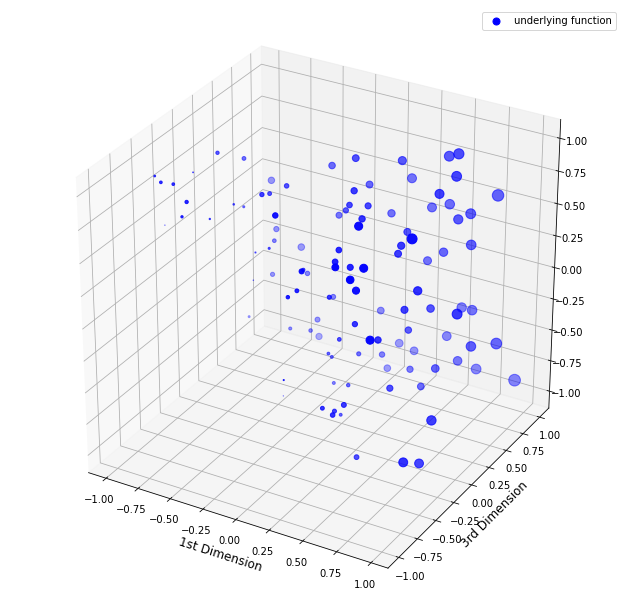

In [ ]:
import pytorch_lightning as pl

class DeepNormalModelPL(pl.LightningModule):
    def __init__(self, n_inputs: int = 3, n_hidden: int = 10, learning_rate=0.05):
        super().__init__()

        self.learning_rate = learning_rate
        self.hidden = torch.nn.Linear(n_inputs, n_hidden)
        self.mean_linear = torch.nn.Linear(n_hidden, 1)
        self.scale_linear = torch.nn.Linear(n_hidden, 1)

    def forward(self, x):
        outputs = self.hidden(x)
        outputs = torch.sigmoid(outputs)

        mean = self.mean_linear(outputs)
        scale = torch.nn.functional.softplus(self.scale_linear(outputs))

        return torch.distributions.Normal(mean, scale)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = loss_fn(y_hat, y)
        return loss


model_lightning = DeepNormalModelPL()
trainer = pl.Trainer(max_epochs=40, progress_bar_refresh_rate=20)
trainer.fit(model_lightning, dataloader_train, dataloader_test)
y_hat = model_lightning(torch.Tensor(x[:, np.newaxis]))
plot_4d(x_train, y_train)

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

class DeepNormalModelPLES(DeepNormalModelPL):
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = loss_fn(y_hat, y)
        self.log("val_loss", loss)
        return loss


model_lightning = DeepNormalModelPLES()
trainer = pl.Trainer(
    max_epochs=40,
    callbacks=[EarlyStopping(monitor="val_loss")],
    progress_bar_refresh_rate=20,
)
trainer.fit(model_lightning, dataloader_train, dataloader_test)


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:97: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=20)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name         | Type   | Params
----------------------------------------
0 | hidden       | Linear | 40    
1 | mean_linear  | Linear | 11    
2 | scale_linear | Linear | 11    
----------------------------------------
62        Trainable params
0         Non-trainable params
62        Total params
0.000     Total estimated

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:505: PossibleUserWarning: Your `val_dataloader` has `shuffle=True`, it is strongly recommended that you turn this off for val/test/predict dataloaders.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1906: PossibleUserWarning: The number of training samples (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

### **3 layer deep neural network for non linear regression using tensorflow**

In [ ]:
# importing Libraries
import tensorflow as tf
from tensorflow import keras

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
10/10 [==============================] - 1s 3ms/step - loss: 9.0423
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.9757
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9006
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8884
Epoch 

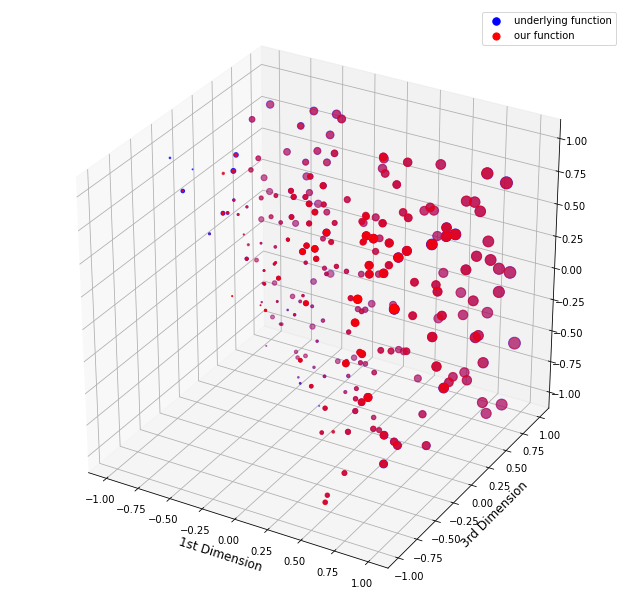

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_4d(x, y_true, model(x))

## **Used Tensorflow's various variants high level, api, functional, model, builtin**

### **End to end Linear Regression Model without using High Level API's such as MeanSquareError or Layers.**

In [ ]:
# generate sample data using non-linear equation
input_dim = 3
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

print(f'Input dimension: {input_dim},weights: {weights.shape}, bias: {bias.shape}')

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Input dimension: 3,weights: (3, 1), bias: (1,)


### Prepare Sample data

In [ ]:
# prepare a dataset of 3 dimension.
from scipy.stats import multivariate_normal

num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
data_features = features[:, : , 1]
data_labels = np.vstack((np.zeros((sample_num, 1), dtype='float32'),
                    np.ones((sample_num, 1), dtype='float32')))
print(data_features.shape)

(20000, 3)


### Train Linear Regression by iterarting batch by batch on input data and calling train_on_batch on repeat. 

In [ ]:
# data shuffling.
indexes = np.random.permutation(len(data_features))
data_features = data_features[indexes]
data_labels = data_labels[indexes]

# tf.data.Dataset object creation to handle batched iteration
dataset = tf.data.Dataset.from_tensor_slices((data_features, data_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)
print(indexes)
for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

[ 3683 11545  3479 ... 12322 19396  5741]
Epoch 0: last batch loss = 0.2126
Epoch 1: last batch loss = 0.0607
Epoch 2: last batch loss = 0.0293
Epoch 3: last batch loss = 0.0340
Epoch 4: last batch loss = 0.0389
Epoch 5: last batch loss = 0.0359
Epoch 6: last batch loss = 0.0432
Epoch 7: last batch loss = 0.0310
Epoch 8: last batch loss = 0.0356
Epoch 9: last batch loss = 0.0301


### Check Performance of Model

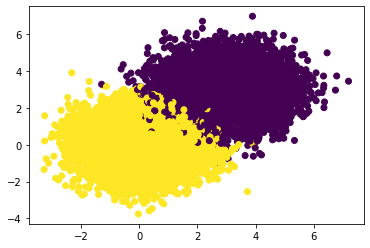

In [ ]:
predictions = compute_predictions(data_features)
plt.scatter(data_features[:, 0], data_features[:, 1], c=predictions[:, 0] > 0.5)

### Increasing the speed with tf.function

In [ ]:
# check run time for current implementation 
import time
current_runtime = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
end_time = time.time() - current_runtime
print('Time per epoch: %.3f s' % (end_time / 20,))

Time per epoch: 0.316 s


In [ ]:
# add tf.function to increase speed
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [ ]:
# check the new speed 
new_runtime = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
end_time = time.time() - new_runtime
print('Time per epoch: %.3f s' % (end_time / 20,))

Time per epoch: 0.151 s


### So as per the above result the model speed is significantly improved.

### **Non-Linear Regression Model only with builtin layers in Tensorflow.**

We don't have to implement our own layers because
Keras provides wide number of layers which includes:


1.   Transposed convolutions
2.   Dropout
3. BatchNormalization
4. Average and max pooling
5. ConvLSTM2D etc.




In [ ]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):
  
  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class MLPWithDropout(Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(3)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(1)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)
    
mlp = MLPWithDropout()
y_train = mlp(tf.ones((3, 3)), training=True)
y_test = mlp(tf.ones((3, 3)), training=False)

### **Regression using tensorflow only using high level api**

In [ ]:
from tensorflow.keras.layers import Layer

# layer incapsulates weights and some computation
class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32, input_dim=32):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

# instantiate our layer.
linear_layer = Linear(4, 2)

Add add_weight method

In [ ]:
class Linear(keras.layers.Layer):

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# lazy layer instantiation.
linear_layer = Linear(4)

# it also calls 'build(input_shape)' and creates weights.
y = linear_layer(tf.ones((2, 2)))

In [ ]:
# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
data_features = features[:, : , 1]
data_labels = np.vstack((np.zeros((sample_num, 1), dtype='float32'),
                    np.ones((sample_num, 1), dtype='float32')))
print(data_features.shape)

# data shuffling.
indexes = np.random.permutation(len(data_features))
data_features = data_features[indexes]
data_labels = data_labels[indexes]

# tf.data.Dataset object creation to handle batched iteration
dataset = tf.data.Dataset.from_tensor_slices((data_features, data_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

# instantiate the linear layer with 10 units.
linear_layer = Linear(10)

# instantiating a logistic loss function which expects integer targets.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# optimizer instantiation.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# iterate on the incoming batches of the dataset.
for step, (x, y) in enumerate(dataset):
  
  # open a GradientTape.
  with tf.GradientTape() as tape:

    # forward pass.
    logits = linear_layer(x)

    # value of loss for incoming batch.
    loss = loss_fn(y, logits)
     
  # get gradients of loss with respect to the weights.
  gradients = tape.gradient(loss, linear_layer.trainable_weights)
  
  # update weights of linear layer.
  optimizer.apply_gradients(zip(gradients, linear_layer.trainable_weights))
  
  # log.
  if step % 100 == 0:
    print('Step:', step, 'Loss:', float(loss))

(20000, 3)
Step: 0 Loss: 2.3609633445739746


### **Using Functional high level api  of tensorflow for Non-Linear Regression**

Functional API are more shorter than using subclasses and they also provide other advantages.

In [ ]:
# functional API focuses on defining transformations per-sample.
# model created will itself batch the per-sample transformations,
# so as to make batches of data.
inputs = tf.keras.Input(shape=(32,))

# using Linear layer defined earlier.
x = Linear(32)(inputs) 
# using Dropout layer defined earlier
x = Dropout(0.5)(x) 
outputs = Linear(10)(x)

# defining functional model by specifying inputs and outputs.
# model itself is a layer like any other.
model = tf.keras.Model(inputs, outputs)

# weights for model
assert len(model.weights) == 4

# calling model on some data.
y = model(tf.ones((2, 32)))
assert y.shape == (2, 10)

### Sequential Layer

For Single output and single input simple stack we use Sequential layer.

In [ ]:
from tensorflow.keras import Sequential

sequential_model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = sequential_model(tf.ones((2, 32)))
assert y.shape == (2, 10)

### Loss Classes

Kearas also provides wide range of loss classes such as BinaryCrossEntropy, KLDivergence.

In [ ]:
bce = tf.keras.losses.BinaryCrossentropy()
# target variable
y_true = [0., 0., 1., 1.] 
# predicted variable
y_pred = [1., 1., 1., 0.]  
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 11.522857


### Metric Classes

Kears provides metric classes such as BinaryAccuracy, FalsePositives etc.

In [ ]:
metric_val = tf.keras.metrics.AUC()
metric_val.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', metric_val.result().numpy())

metric_val.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', metric_val.result().numpy())

Intermediate result: 0.6666667
Final result: 0.71428573


### End to end loop and Optimizer

In [ ]:
from tensorflow.keras import layers

# prepare a dataset of 3 dimension.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
data_features = features[:, : , 1]
data_labels = np.vstack((np.zeros((sample_num, 1), dtype='float32'),
                    np.ones((sample_num, 1), dtype='float32')))
print(data_features.shape)
# data shuffling.
indexes = np.random.permutation(len(data_features))
data_features = data_features[indexes]
data_labels = data_labels[indexes]

# tf.data.Dataset object creation to handle batched iteration
dataset = tf.data.Dataset.from_tensor_slices((data_features, data_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

# instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# instantiate optimizer.
optimizer = tf.keras.optimizers.Adam()

# iterate over batches of dataset.
for step, (x, y) in enumerate(dataset):
  # open a GradientTape.
  with tf.GradientTape() as tape:

    # forward pass.
    logits = model(x)

    # loss value for incoming batch.
    loss_value = loss(y, logits)
     
  # get gradients of loss with respect to the weights.
  gradients = tape.gradient(loss_value, model.trainable_weights)
  
  # update the weights of linear layer.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  # update the running accuracy.
  accuracy.update_state(y, logits)
  
  # log.
  if step % 100 == 0:
    print('Step:', step)
    print('Loss from last step: %.3f' % loss_value)
    print('Total running accuracy so far: %.3f' % accuracy.result())

(20000, 3)
Step: 0
Loss from last step: 2.297
Total running accuracy so far: 0.000


### An End to end Example

In [ ]:
# prepare a dataset of 3 dimension.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=(num_samples,3))
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
data_features = features[:, : , 1]
data_labels = np.vstack((np.zeros((sample_num, 1), dtype='float32'),
                    np.ones((sample_num, 1), dtype='float32')))

# data shuffling.
indexes = np.random.permutation(len(data_features))
data_features = data_features[indexes]
data_labels = data_labels[indexes]

# tf.data.Dataset object creation to handle batched iteration
dataset = tf.data.Dataset.from_tensor_slices((data_features, data_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

# instantiate a simple classification model
sq_model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [ ]:
# call compile to monitor metrics, configure compiler and loss
sq_model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [ ]:
sq_model.fit(dataset, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9956
Epoch 2/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0116 - sparse_categorical_accuracy: 0.9956
Epoch 3/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0109 - sparse_categorical_accuracy: 0.9959
Epoch 4/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9954
Epoch 5/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0109 - sparse_categorical_accuracy: 0.9955
Epoch 6/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0111 - sparse_categorical_accuracy: 0.9958
Epoch 7/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9954
Epoch 8/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0103 - sparse_categorical_accuracy: 0.9955
Epoch 9/10
79/79 [==============================] - 1s 8m